In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn

In [2]:
df = pd.read_csv("mall customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.rename(columns={'Annual Income (k$)':'Income', 'Spending Score (1-100)':'Score'}, inplace=True)

In [6]:
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df = df.drop('CustomerID', axis=1)

In [8]:
df.describe()

,Age,Income,Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


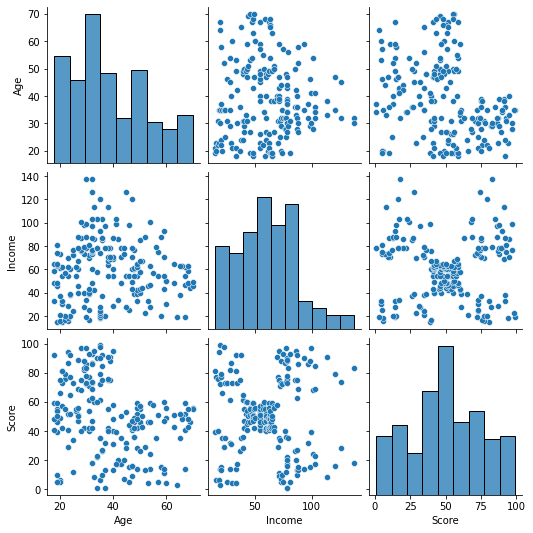

In [9]:
seaborn.pairplot(df[['Age', 'Income', 'Score']])

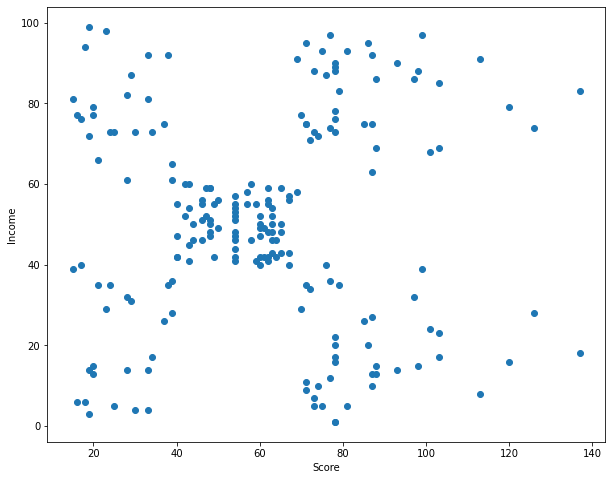

In [10]:
plt.figure(figsize=(10, 8))
plt.xlabel('Score')
plt.ylabel("Income")

plt.scatter(df.Income, df.Score)

# KMeans Cluster 

In [11]:
from sklearn.cluster import KMeans

In [12]:
km1 = KMeans()

In [13]:
predict = km1.fit_predict(df[["Income", "Score"]])

In [14]:
predict

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 5, 0, 5, 5,
       3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 6, 1, 6, 1,
       2, 1, 6, 1, 6, 1, 6, 1, 6, 1, 2, 1, 6, 1, 2, 1, 6, 1, 6, 1, 6, 1,
       6, 1, 6, 1, 6, 1, 2, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1,
       6, 1, 6, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4,
       7, 4])

In [15]:
df['initial_cluster'] = predict

In [16]:
df.head()

,Gender,Age,Income,Score,initial_cluster
0,Male,19,15,39,3
1,Male,21,15,81,0
2,Female,20,16,6,3
3,Female,23,16,77,0
4,Female,31,17,40,3


In [17]:
center1 = km1.cluster_centers_

In [18]:
center1

array([[ 25.0952381 ,  80.04761905],
       [ 78.03571429,  81.89285714],
       [ 64.45      ,  46.45      ],
       [ 25.14285714,  19.52380952],
       [108.18181818,  82.72727273],
       [ 47.72340426,  50.82978723],
       [ 80.18181818,  12.68181818],
       [109.7       ,  22.        ]])

In [19]:
km1.predict([['90', '79']])

array([1])

In [20]:
df['initial_cluster']

0      3
1      0
2      3
3      0
4      3
      ..
195    4
196    7
197    4
198    7
199    4
Name: initial_cluster, Length: 200, dtype: int32

In [21]:
df0 = df[df.initial_cluster == 0]
df1 = df[df.initial_cluster == 1]
df2 = df[df.initial_cluster == 2]
df3 = df[df.initial_cluster == 3]
df4 = df[df.initial_cluster == 4]
df5 = df[df.initial_cluster == 5]
df6 = df[df.initial_cluster == 6]
df7 = df[df.initial_cluster == 7]

In [22]:
print('df0 shape : ', df0.shape)
print('df1 shape : ', df1.shape)
print('df2 shape : ', df2.shape)
print('df3 shape : ', df3.shape)
print('df4 shape : ', df4.shape)
print('df5 shape : ', df5.shape)
print('df6 shape : ', df6.shape)
print('df7 shape : ', df7.shape)

df0 shape :  (21, 5)
df1 shape :  (28, 5)
df2 shape :  (40, 5)
df3 shape :  (21, 5)
df4 shape :  (11, 5)
df5 shape :  (47, 5)
df6 shape :  (22, 5)
df7 shape :  (10, 5)


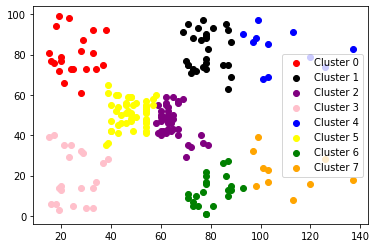

In [23]:
plt.scatter(df0['Income'], df0['Score'], color = 'red', label = 'Cluster 0')
plt.scatter(df1['Income'], df1['Score'], color = 'black', label = 'Cluster 1')
plt.scatter(df2['Income'], df2['Score'], color = 'purple', label = 'Cluster 2')
plt.scatter(df3['Income'], df3['Score'], color = 'pink', label = 'Cluster 3')
plt.scatter(df4['Income'], df4['Score'], color = 'blue', label = 'Cluster 4')
plt.scatter(df5['Income'], df5['Score'], color = 'yellow', label = 'Cluster 5')
plt.scatter(df6['Income'], df6['Score'], color = 'green', label = 'Cluster 6')
plt.scatter(df7['Income'], df7['Score'], color = 'orange', label = 'Cluster 7')


plt.legend()

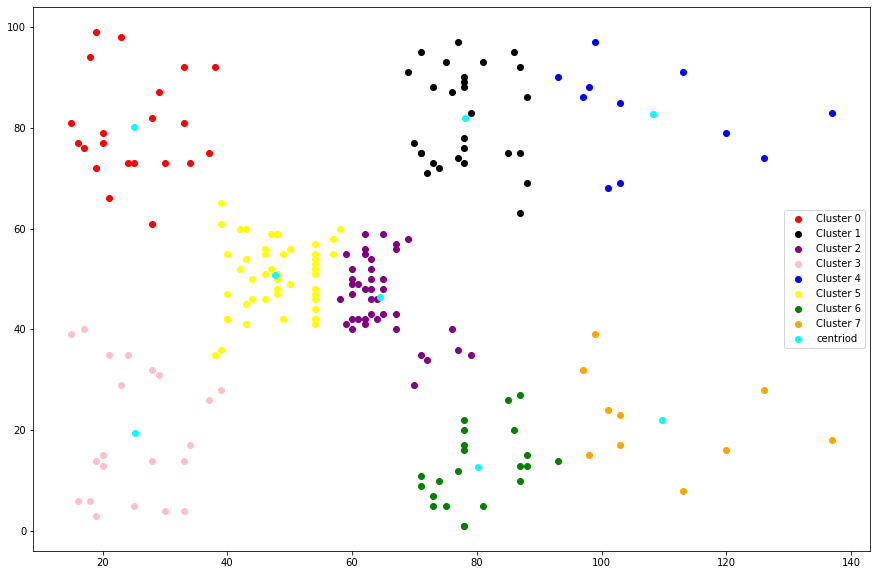

In [24]:
plt.figure(figsize=(15, 10))
plt.scatter(df0['Income'], df0['Score'], color = 'red', label = 'Cluster 0')
plt.scatter(df1['Income'], df1['Score'], color = 'black', label = 'Cluster 1')
plt.scatter(df2['Income'], df2['Score'], color = 'purple', label = 'Cluster 2')
plt.scatter(df3['Income'], df3['Score'], color = 'pink', label = 'Cluster 3')
plt.scatter(df4['Income'], df4['Score'], color = 'blue', label = 'Cluster 4')
plt.scatter(df5['Income'], df5['Score'], color = 'yellow', label = 'Cluster 5')
plt.scatter(df6['Income'], df6['Score'], color = 'green', label = 'Cluster 6')
plt.scatter(df7['Income'], df7['Score'], color = 'orange', label = 'Cluster 7')

plt.scatter(center1[:, 0], center1[:, 1], color = 'cyan', label = 'centriod')

plt.legend()

# WCSS

In [25]:
wcss = []
cluster = range(1, 15)

for k in cluster:
    km2 = KMeans(n_clusters=k)
    km2.fit((df[["Income", "Score"]]))
    wcss.append(km2.inertia_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [26]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37271.88623658948,
 30227.60651315203,
 25011.839349156595,
 21838.863692828916,
 19701.35225128174,
 17577.687828862057,
 15810.343426539735,
 14292.543823365135,
 13229.34058719058]

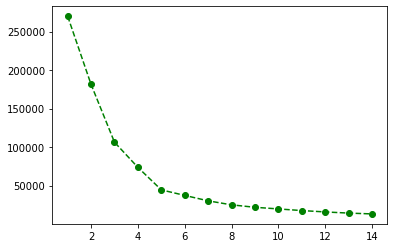

In [27]:
plt.plot(cluster, wcss, 'go--')

In [28]:
!pip install kneed

In [29]:
from kneed import KneeLocator

In [30]:
kn = KneeLocator(cluster, wcss, curve = 'convex', direction = 'decreasing')

In [31]:
kn.knee

5

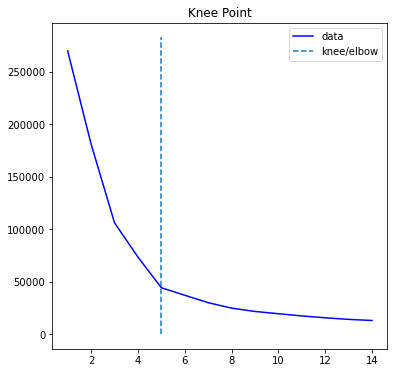

In [32]:
kn.plot_knee()

In [33]:
km2 = KMeans(n_clusters=5)

In [34]:
predicted = km2.fit_predict(df[["Income", "Score"]])

In [35]:
df['initial_clusters1'] = predicted

In [36]:
center2 = km2.cluster_centers_

In [40]:
df_0 = df[df.initial_clusters1 == 0]
df_1 = df[df.initial_clusters1 == 1]
df_2 = df[df.initial_clusters1 == 2]
df_3 = df[df.initial_clusters1 == 3]
df_4 = df[df.initial_clusters1 == 4]

In [41]:
print('df0 shape : ', df_0.shape)
print('df1 shape : ', df_1.shape)
print('df2 shape : ', df_2.shape)
print('df3 shape : ', df_3.shape)
print('df4 shape : ', df_4.shape)

df0 shape :  (39, 6)
df1 shape :  (81, 6)
df2 shape :  (22, 6)
df3 shape :  (35, 6)
df4 shape :  (23, 6)


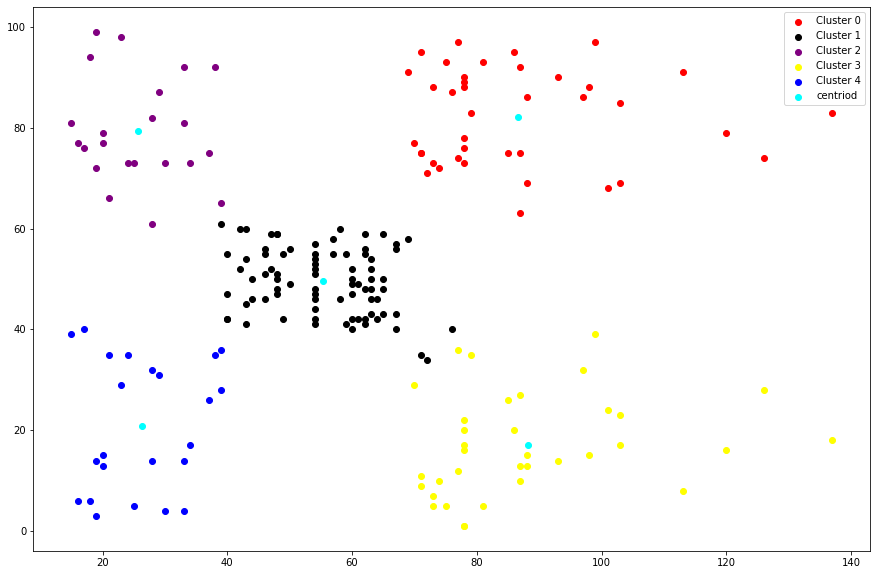

In [42]:
plt.figure(figsize=(15, 10))
plt.scatter(df_0['Income'], df_0['Score'], color = 'red', label = 'Cluster 0')
plt.scatter(df_1['Income'], df_1['Score'], color = 'black', label = 'Cluster 1')
plt.scatter(df_2['Income'], df_2['Score'], color = 'purple', label = 'Cluster 2')
plt.scatter(df_3['Income'], df_3['Score'], color = 'yellow', label = 'Cluster 3')
plt.scatter(df_4['Income'], df_4['Score'], color = 'blue', label = 'Cluster 4')

plt.scatter(center2[:, 0], center2[:, 1], color = 'cyan', label = 'centriod')

plt.legend()